# This notebook explains how to build a Linear Regression Model 
    - Age_heigh_weight_gener dataset is used here
    - Problem statement : 
        Build a Linear Regression Model to predict the weight of person
    

In [1]:
%matplotlib inline 
import pandas as pd 
import numpy as np
from math import sqrt

# Visualization Modules
import matplotlib
from matplotlib import pyplot as plt

#Scipy Maths Models
import statsmodels.api as sm
from scipy import stats

# Machine Learning Training Modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Loading Dataset 

In [10]:
data_file = 'weatherHistory.csv' # make sure the path of the file is correct
df = pd.read_csv(data_file)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [12]:
# df.plot(x='Humidity', y'Pressure (millibars)', kind='scatter')
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

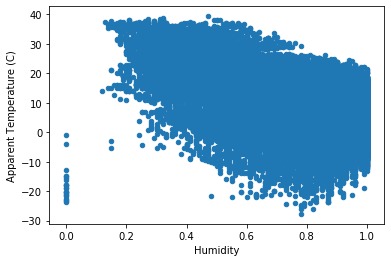

In [14]:
df.plot(x='Humidity', y='Apparent Temperature (C)', kind='scatter')

## #  Data Insight

Below part explains the data correlation 

In [3]:
df.describe() # shows summary of complete dataset , Note: Categorical data cannot be summarized

,Age,Height,Weight
count,237.000000,237.000000,237.000000
mean,164.430380,61.364557,101.308017
std,18.425767,3.945402,19.440698
min,139.000000,50.500000,50.500000
25%,148.000000,58.800000,85.000000
50%,163.000000,61.500000,101.000000
75%,178.000000,64.300000,112.000000
max,250.000000,72.000000,171.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2de0104a8>,
      dtype=object)

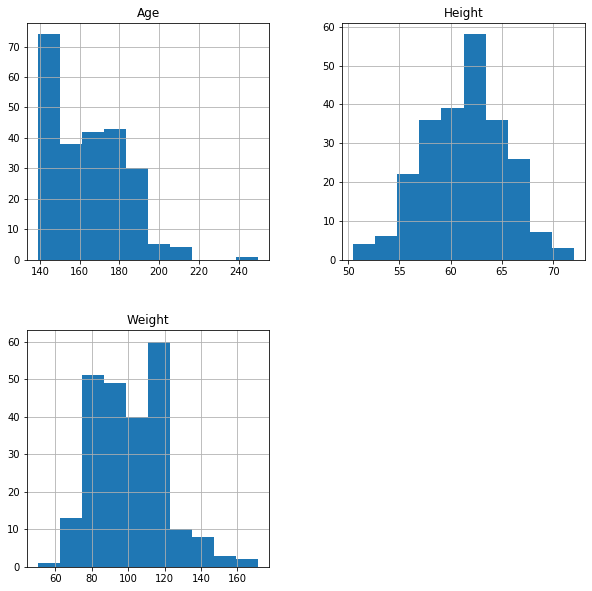

In [4]:
df.hist(figsize=(10,10)) # Helps to see the distribution of each feature using histogram 

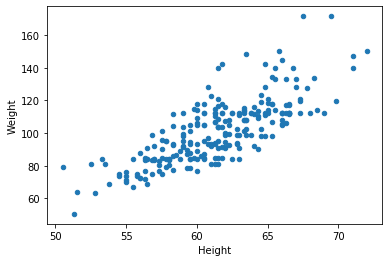

In [5]:
df.plot(x='Height', y='Weight', kind='scatter')

In [6]:
df.corr() # Shows the correlation between two variables

,Age,Height,Weight
Age,1.000000,0.648857,0.634636
Height,0.648857,1.000000,0.774876
Weight,0.634636,0.774876,1.000000


# Model Training and Evaluation

Co-Efficient value : [3.87729472]
Y-intercept : -136.3996311343031
Model Score : 0.5556475277965905
Mean Squared Error : 145.02997392565715
Root Mean Squared Error : 12.042839113998706
Rsquare : 0.5556475277965907


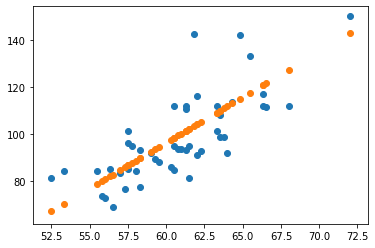

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df[['Height']], df['Weight'], test_size=0.20, shuffle=True) 

# Try using Age as a Feature also during training also (MultiLinear Regression)
# When Shuffle = True data set is shuffled so u see different results for every fit
# to use same dataset for every fit use random_state value 

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
co_efficient = lr_reg.coef_
intercept = lr_reg.intercept_
score = lr_reg.score(X_test, y_test)

# print(X_test.head())
print("Co-Efficient value :", co_efficient)
print("Y-intercept :", intercept)
print("Model Score :", score)


y_pred = lr_reg.predict(X_test)
MSE = mse(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print("Mean Squared Error :", MSE)
print("Root Mean Squared Error :", sqrt(MSE))
print("Rsquare :", R2)



plt.scatter(x=X_test.Height, y=y_test)
plt.scatter(x=X_test.Height, y=y_pred)
plt.show()

### Points to Poder :
    - It is very important that dataset is shuffled well to avoid any element of bias/patterns in the split datasets before training the ML model.
    - You can use math.sqrt(MSE) to get the RMSE value 

In [8]:
# P value 
X1 = X_train.Height.values#sm.add_constant(X_train.Height.values)
y1 = y_train.values

lin_reg = sm.OLS(X1, y1).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.979
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              8728.
Date:                Sat, 31 Aug 2019   Prob (F-statistic):                   1.68e-159
Time:                        08:39:58   Log-Likelihood:                         -682.43
No. Observations:                 189   AIC:                                      1367.
Df Residuals:                     188   BIC:                                      1370.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5865      0.006     93.422      0.000       0.574       0.599
==============================================================================
Omnibus:                       29.336   Durbin-Watson:                   1.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.316
Skew:                          -0.878   Prob(JB):                     3.93e-10
Kurtosis:                       4.555   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the ideal MSE isn't 0, since then you would have a model that perfectly predicts your training data, but which is very unlikely to perfectly predict any other data. What you want is a balance between overfit (very low MSE for training data) and underfit (very high MSE for test/validation/unseen data). It looks like you are currently overfitting slightly (because training MSE is lower than validation MSE), but the R2 isn't much lower, so - unless you really need to explore the tradeoff - your model should be useful to predict data that you haven't yet seen.